In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
from geobipy import StatArray
from geobipy import TopoRectilinearMesh2D
import matplotlib.pyplot as plt
import numpy as np

### Create input StatArrays for the horizontal and vertical (x and y) mesh axes

In [2]:
x = StatArray(np.arange(10.0), 'Easting', 'm')
y = StatArray(np.arange(10.0), 'Northing', 'm')

### Create a height profile for the mesh

In [3]:
height = StatArray(np.asarray([5,4,3,2,1,1,2,3,4,5])*3.0, 'Height', 'm')

### Instantiate the mesh

In [4]:
rm = TopoRectilinearMesh2D(xCentres=x, yCentres=y, heightCentres=height)

#### Plot only the grid lines of the mesh

<IPython.core.display.Javascript object>


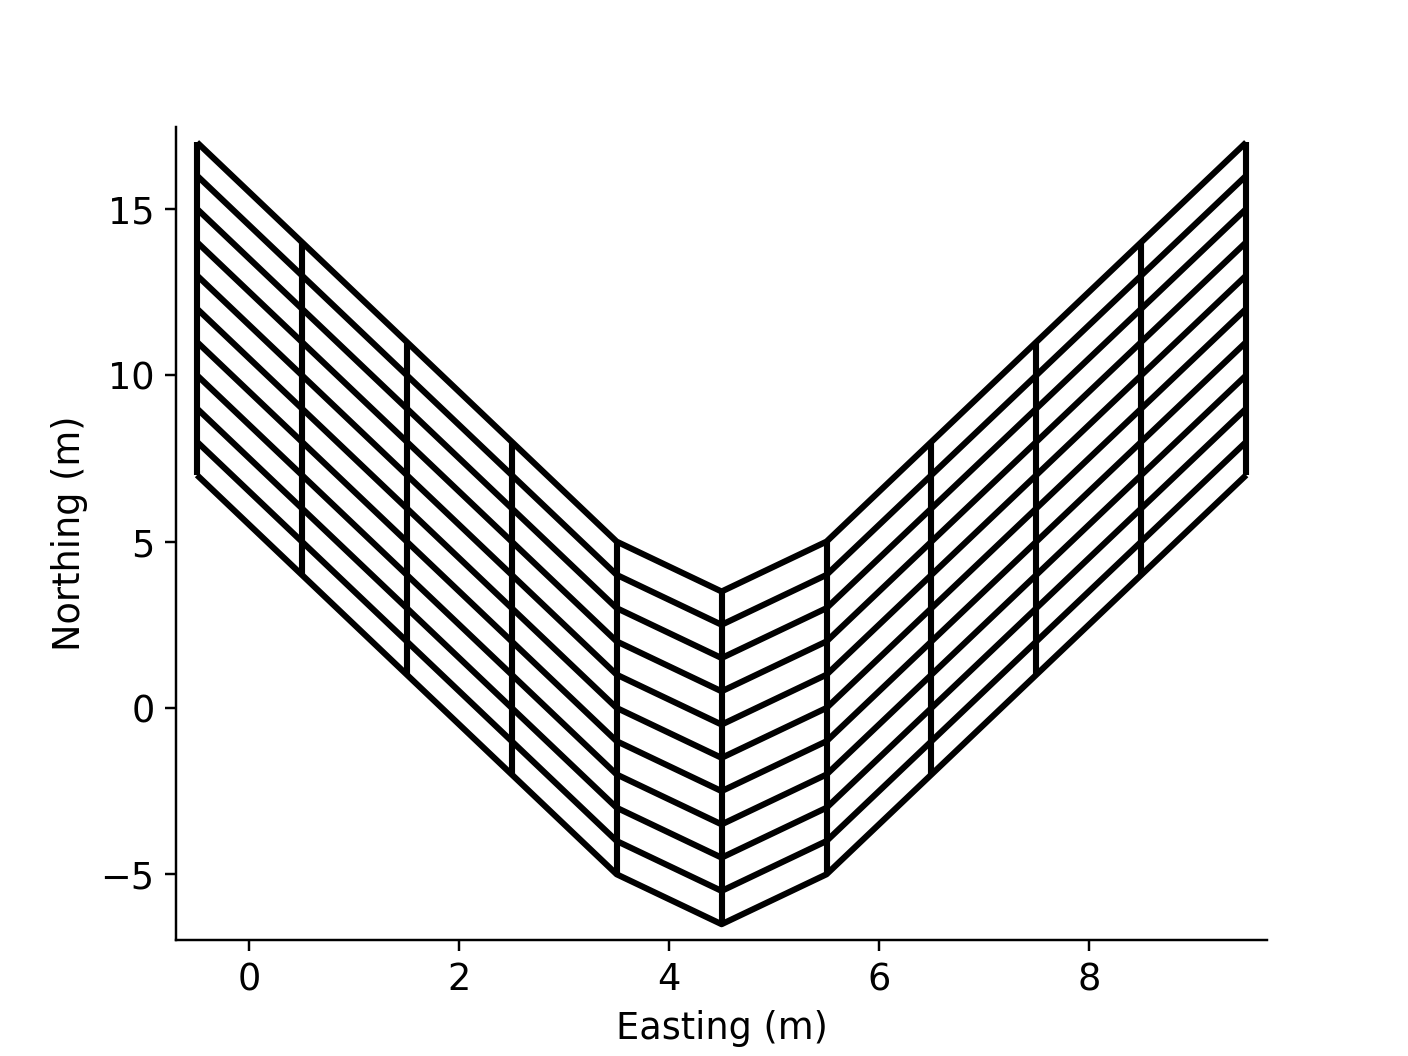

In [5]:
plt.figure()
rm.plotGrid()

### Create an array of random numbers that we can pass to the mesh and perform operations

In [6]:
values = StatArray(np.random.random(rm.dims), 'Name', 'Units')

### Compute the mean over an interval for the mesh.

In [7]:
rm.intervalMean(values, intervals=[6.8, 12.4], axis=0)

array([[0.2253939 , 0.74627623, 0.36784519, 0.58808676, 0.57317351,
        0.55315931, 0.17319261, 0.54703483, 0.62599001, 0.92343834]])

### Compute the mean over multiple intervals for the mesh.

In [8]:
rm.intervalMean(values, intervals=[6.8, 12.4, 20.0, 40.0], axis=0)

array([[0.2253939 , 0.74627623, 0.36784519, 0.58808676, 0.57317351,
        0.55315931, 0.17319261, 0.54703483, 0.62599001, 0.92343834],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]])

In [9]:
rm.intervalMean(values, intervals=[2.8, 4.2], axis=1)

array([[0.45583649],
       [0.34485532],
       [0.41770222],
       [0.83774349],
       [0.52294678],
       [0.50330489],
       [0.42552364],
       [0.64966064],
       [0.81702422],
       [0.27520554]])

In [10]:
rm.intervalMean(values, intervals=[2.8, 4.2, 5.1, 8.4], axis=1)

array([[0.45583649, 0.84638074, 0.66843858],
       [0.34485532, 0.37353431, 0.72513459],
       [0.41770222, 0.38339791, 0.6641998 ],
       [0.83774349, 0.16849072, 0.34726259],
       [0.52294678, 0.06722049, 0.55679781],
       [0.50330489, 0.28021817, 0.32623626],
       [0.42552364, 0.84604774, 0.60692699],
       [0.64966064, 0.92112495, 0.46530443],
       [0.81702422, 0.44159749, 0.71229664],
       [0.27520554, 0.29675548, 0.16861639]])

In [11]:
rm.ravelIndices([[3, 4], [5, 5]])

array([35, 45])

In [12]:
rm.unravelIndex([35, 45])

(array([3, 4]), array([5, 5]))

<IPython.core.display.Javascript object>


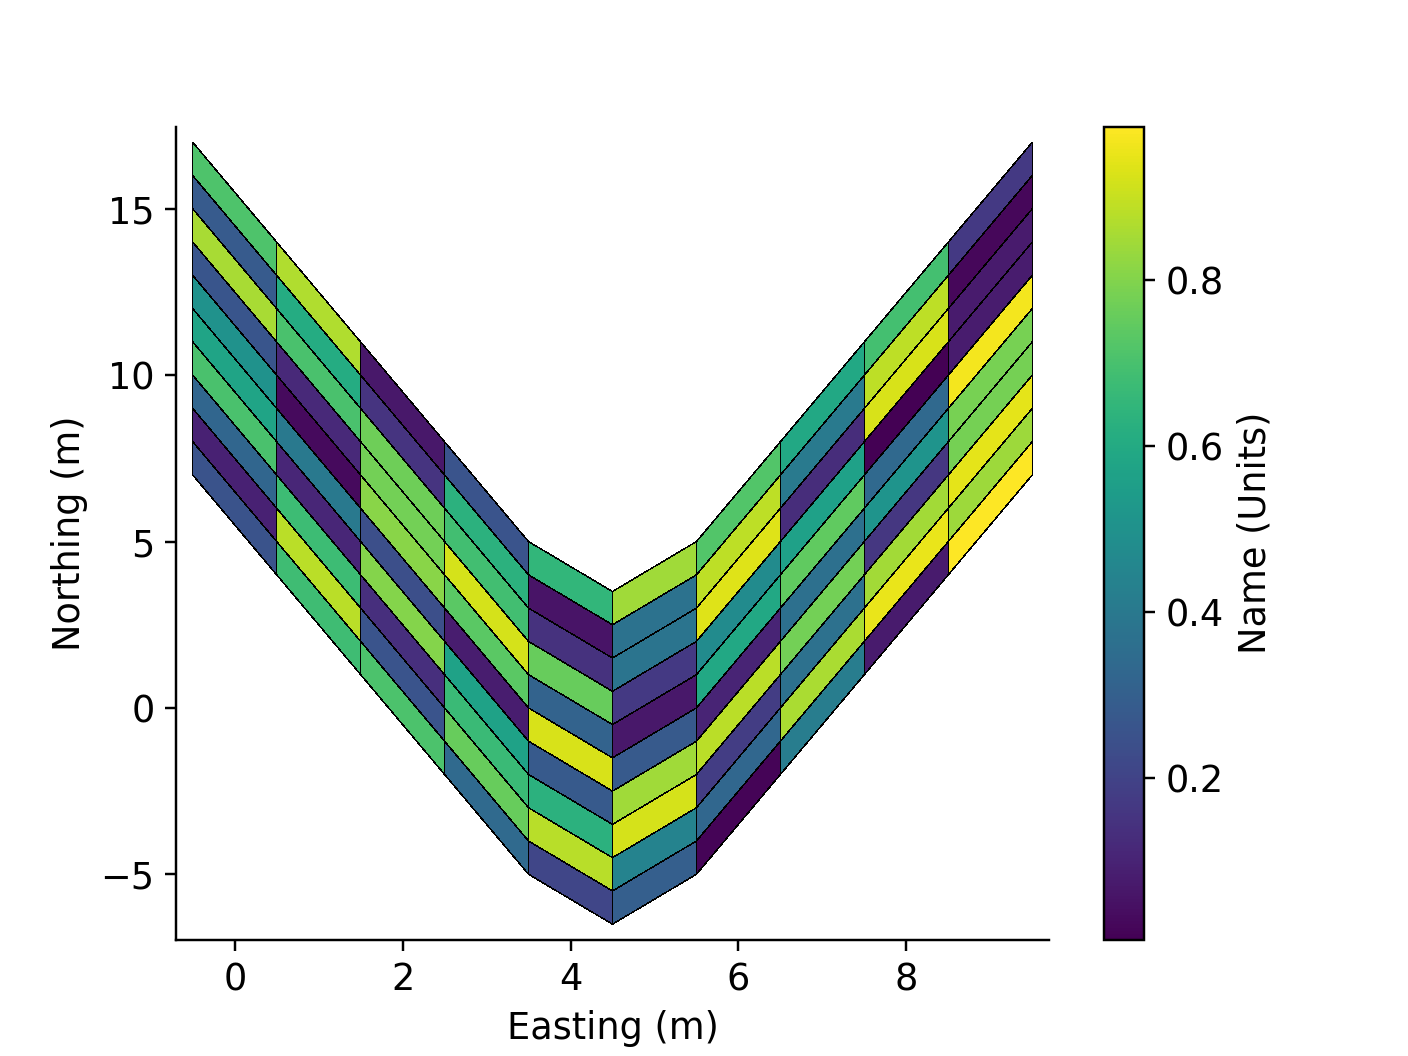

In [13]:
plt.figure()
rm.pcolor(values, grid=True, linewidth=0.1, xAxis='x')

### Create a line with three dimensions.

In [14]:
z = StatArray(np.cumsum(np.arange(10.0)), 'Depth', 'm')

In [15]:
rm = TopoRectilinearMesh2D(xCentres=x, yCentres=y, zCentres=z, heightCentres=height)
values = StatArray(np.arange(rm.nCells, dtype=np.float).reshape(rm.dims), 'Name', 'Units')

<IPython.core.display.Javascript object>


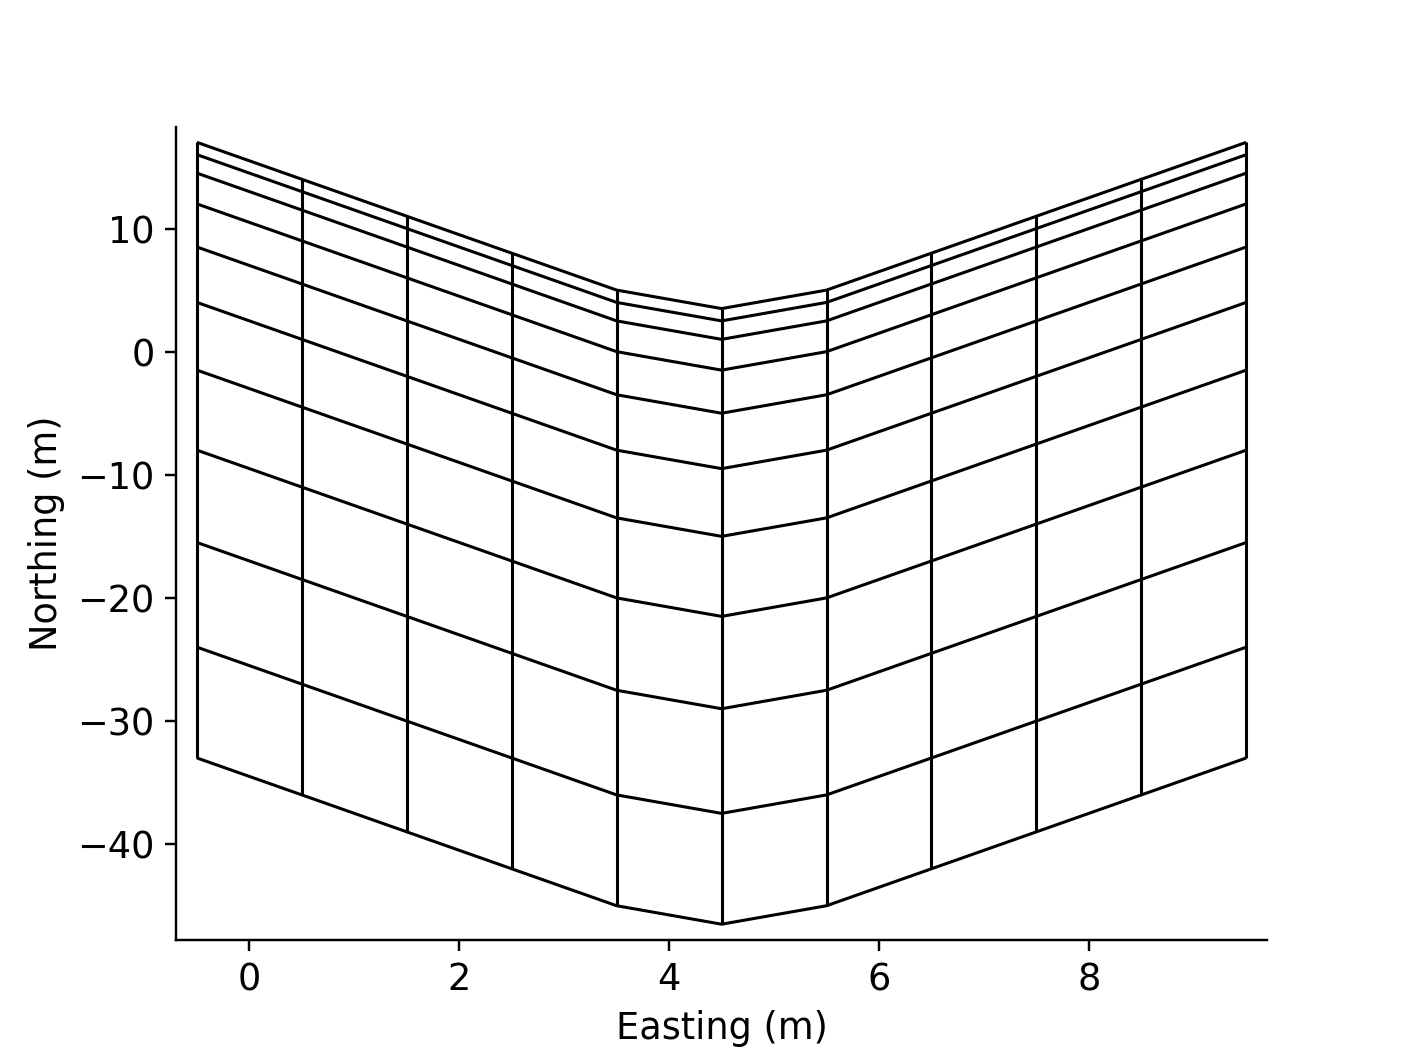

In [16]:
plt.figure()
rm.plotGrid(linewidth=1)

### The pcolor function can now be plotted against distance

<IPython.core.display.Javascript object>


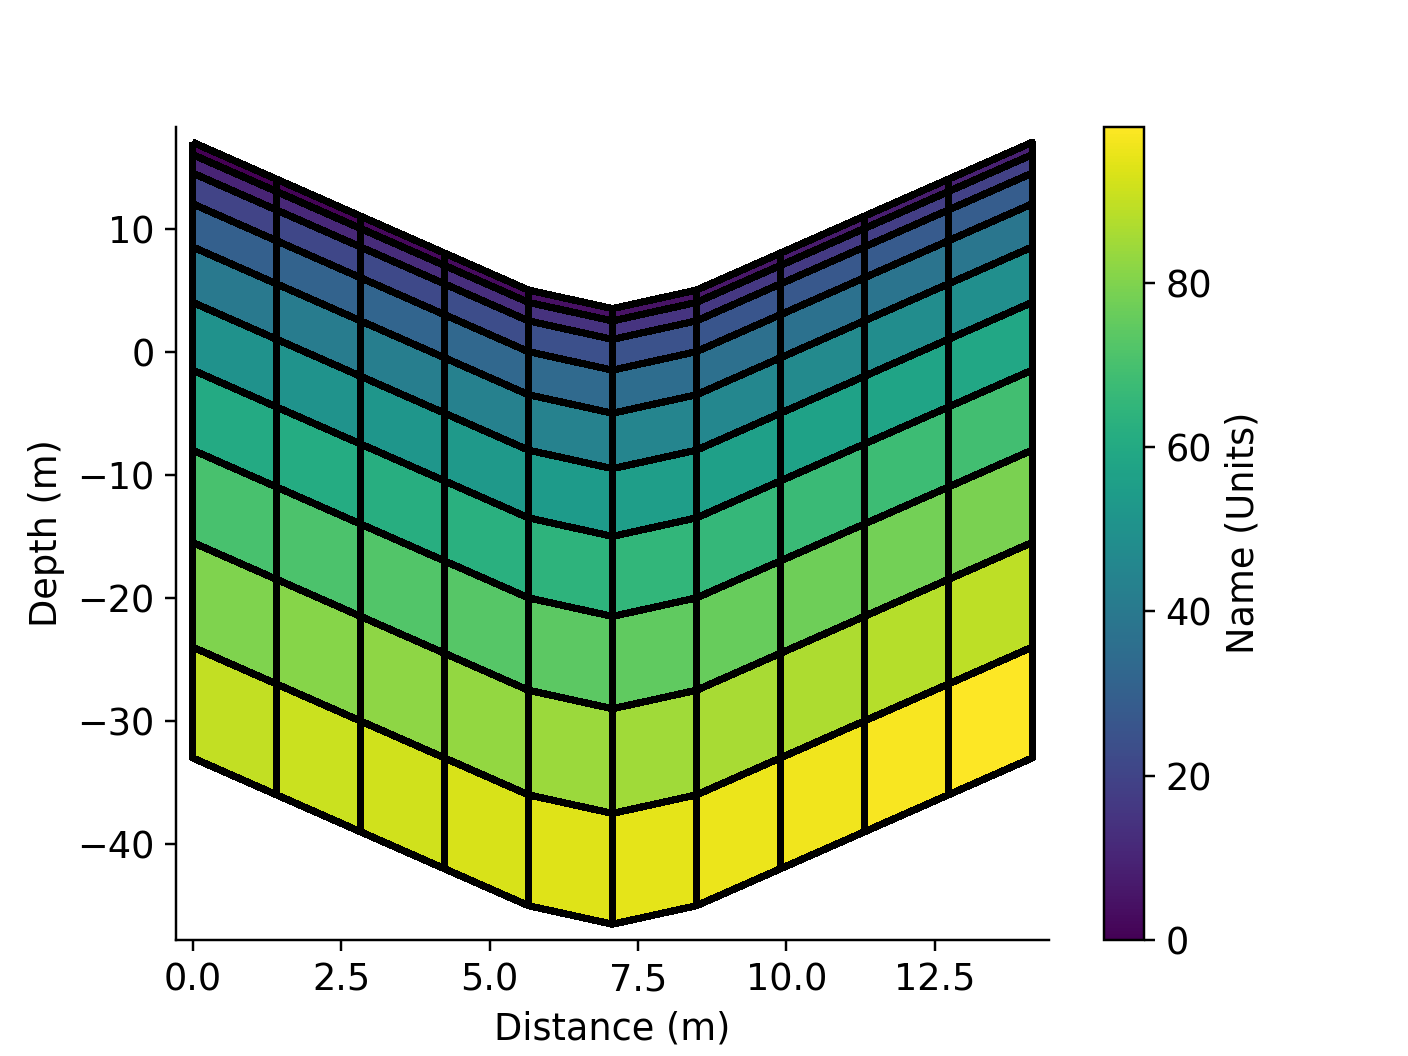

In [17]:
plt.figure()
rm.pcolor(values, grid=True, xAxis='r')

#### And we can plot the x-y co-ordinates

<IPython.core.display.Javascript object>


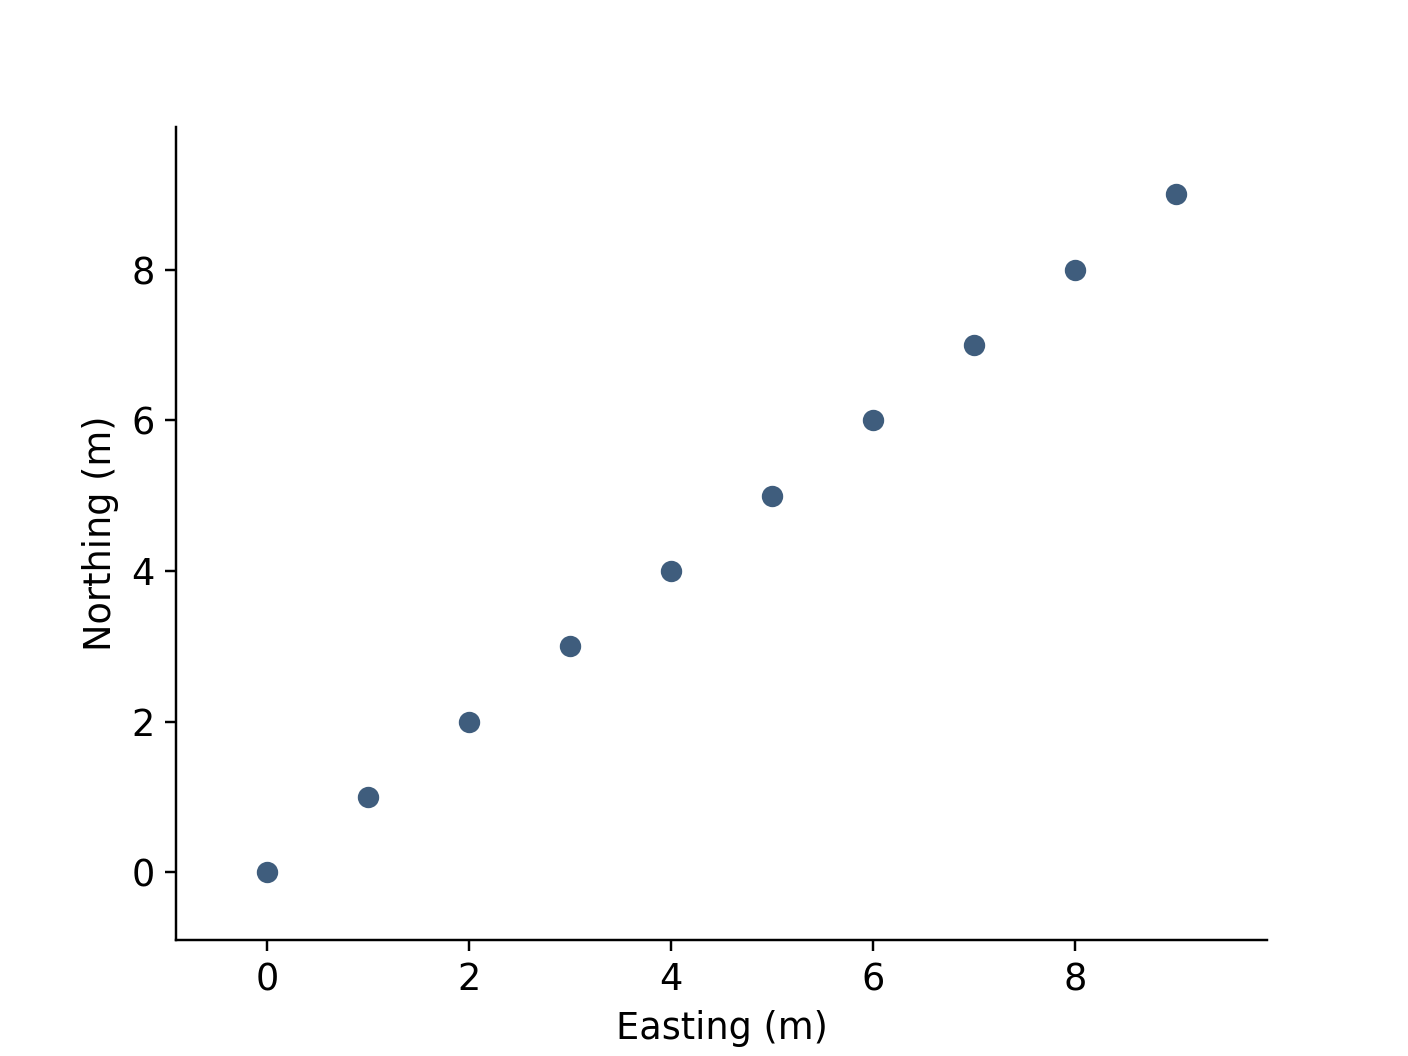

In [18]:
plt.figure()
rm.plotXY()

In [19]:
# x = StatArray(np.arange(3.0), 'Easting', 'm')
# y = StatArray(np.arange(3.0), 'Northing', 'm')
# z = StatArray(np.cumsum(np.arange(4.0)), 'Depth', 'm')
# height = StatArray(np.asarray([1,2,3])*10.0, 'Height', 'm')

In [20]:
# rm = TopoRectilinearMesh2D(xCentres=x, yCentres=y, zCentres=z, heightCentres=height)

In [21]:
rm.toVTK('test', cellData=values)